<a href="https://colab.research.google.com/github/JoaoGPortela/medallion_architecture/blob/main/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.makedirs('/content/bronze_collection', exist_ok=True)
os.makedirs('/content/silver_collection', exist_ok=True)
os.makedirs('/content/gold_collection', exist_ok=True)

os.listdir('/content/')


['.config',
 'silver_collection',
 'gold_collection',
 'bronze_collection',
 'sample_data']

In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import pandas as pd

cred = credentials.Certificate("key.json")
firebase_admin.initialize_app(cred, {
    'storageBucket': 'joaobondezan5na.appspot.com'
})

bucket = storage.bucket()



In [ ]:
blobs = bucket.list_blobs()

for blob in blobs:
    print(blob.name)


bronze_collection/
bronze_collection/dataset1.csv
bronze_collection/dataset2.csv
bronze_collection/dataset3.csv
bronze_collection/dataset4.csv
bronze_collection/dataset5.csv
gold_collection/
silver_collection/


In [ ]:
def download_from_firebase_to_colab(file_name, folder):

    blob = bucket.blob(f"{folder}/{file_name}")


    file_path = f"/content/{folder}/{file_name}"


    blob.download_to_filename(file_path)

    print(f"Arquivo {file_name} baixado para {file_path}")
    return pd.read_csv(file_path)

df1 = download_from_firebase_to_colab("dataset1.csv", "bronze_collection")
df2 = download_from_firebase_to_colab("dataset2.csv", "bronze_collection")
df3 = download_from_firebase_to_colab("dataset3.csv", "bronze_collection")
df4 = download_from_firebase_to_colab("dataset4.csv", "bronze_collection")
df5 = download_from_firebase_to_colab("dataset5.csv", "bronze_collection")


Arquivo dataset1.csv baixado para /content/bronze_collection/dataset1.csv
Arquivo dataset2.csv baixado para /content/bronze_collection/dataset2.csv
Arquivo dataset3.csv baixado para /content/bronze_collection/dataset3.csv
Arquivo dataset4.csv baixado para /content/bronze_collection/dataset4.csv
Arquivo dataset5.csv baixado para /content/bronze_collection/dataset5.csv


In [ ]:
def clean_data(df):

    df_cleaned = df.dropna()


    df_cleaned.columns = [col.lower().replace(" ", "_") for col in df_cleaned.columns]


    return df_cleaned

df1_silver = clean_data(df1)
df2_silver = clean_data(df2)
df3_silver = clean_data(df3)
df4_silver = clean_data(df4)
df5_silver = clean_data(df5)

print(df1_silver.head())


         time  tavg  tmin  tmax  prcp
1  02-01-1990  22.2  16.5  29.9   0.0
2  03-01-1990  21.8  16.3  30.7   0.0
3  04-01-1990  25.4  17.9  31.8   0.0
4  05-01-1990  26.5  19.3  33.7   0.0
5  06-01-1990  25.1  19.8  33.5   0.0


In [ ]:
def save_to_silver(df, file_name):
    file_path = f"/content/silver_collection/{file_name}"
    df.to_csv(file_path, index=False)
    print(f"{file_name} salvo na camada Silver")
    return file_path

save_to_silver(df1_silver, "dataset1_silver.csv")
save_to_silver(df2_silver, "dataset2_silver.csv")
save_to_silver(df3_silver, "dataset3_silver.csv")
save_to_silver(df4_silver, "dataset4_silver.csv")
save_to_silver(df5_silver, "dataset5_silver.csv")


dataset1_silver.csv salvo na camada Silver
dataset2_silver.csv salvo na camada Silver
dataset3_silver.csv salvo na camada Silver
dataset4_silver.csv salvo na camada Silver
dataset5_silver.csv salvo na camada Silver


'/content/silver_collection/dataset5_silver.csv'

In [ ]:
import pandas as pd

def transform_to_gold(df):

    df.loc[:, 'time'] = pd.to_datetime(df['time'], format='%d-%m-%Y', errors='coerce')


    df_gold = df.groupby(df['time'].dt.to_period('M')).agg({
        'tavg': 'mean',  # Média da temperatura média
        'tmin': 'min',   # Temperatura mínima
        'tmax': 'max',   # Temperatura máxima
        'prcp': 'sum'    # Precipitação total
    }).reset_index()

    # Renomeando as colunas para facilitar a compreensão
    df_gold.rename(columns={
        'time': 'periodo',
        'tavg': 'temp_media',
        'tmin': 'temp_minima',
        'tmax': 'temp_maxima',
        'prcp': 'precipitacao_total'
    }, inplace=True)

    return df_gold

df1_gold = transform_to_gold(df1_silver)
df2_gold = transform_to_gold(df2_silver)
df3_gold = transform_to_gold(df3_silver)
df4_gold = transform_to_gold(df4_silver)
df5_gold = transform_to_gold(df5_silver)

print(df1_gold.head())



   periodo  temp_media  temp_minima  temp_maxima  precipitacao_total
0  1990-01   24.822222         10.5         37.1                 0.0
1  1990-02   24.940909         15.1         37.0                 0.0
2  1990-03   25.719231         15.5         37.2                 0.0
3  1990-04   27.839286         20.5         35.9                 0.0
4  1990-05   29.983333         23.5         36.2                66.8


In [ ]:
import os


def save_to_gold(df, filename):

    gold_folder = '/content/gold_collection'


    os.makedirs(gold_folder, exist_ok=True)


    file_path = os.path.join(gold_folder, filename)


    df.to_csv(file_path, index=False)
    print(f"Arquivo salvo em: {file_path}")

save_to_gold(df1_gold, 'df1_gold.csv')
save_to_gold(df2_gold, 'df2_gold.csv')
save_to_gold(df3_gold, 'df3_gold.csv')
save_to_gold(df4_gold, 'df4_gold.csv')
save_to_gold(df5_gold, 'df5_gold.csv')


Arquivo salvo em: /content/gold_collection/df1_gold.csv
Arquivo salvo em: /content/gold_collection/df2_gold.csv
Arquivo salvo em: /content/gold_collection/df3_gold.csv
Arquivo salvo em: /content/gold_collection/df4_gold.csv
Arquivo salvo em: /content/gold_collection/df5_gold.csv



Exibindo dados de: aggregated_data.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,24.196154,16.9,33.3,19.0
1,1990-02,26.895455,18.6,36.0,5.3
2,1990-03,28.830000,21.2,36.6,0.0
3,1990-04,30.356522,24.8,40.7,0.0
4,1990-05,30.461538,23.6,39.0,17.0



Exibindo dados de: df4_gold.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,24.196154,16.9,33.3,19.0
1,1990-02,26.895455,18.6,36.0,5.3
2,1990-03,28.830000,21.2,36.6,0.0
3,1990-04,30.356522,24.8,40.7,0.0
4,1990-05,30.461538,23.6,39.0,17.0



Exibindo dados de: df2_gold.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,16.300000,4.1,29.9,0.0
1,1990-02,17.863636,8.3,29.0,27.2
2,1990-03,23.213333,8.3,36.2,0.0
3,1990-04,32.233333,21.1,42.3,0.0
4,1990-05,32.762500,20.7,41.1,0.5



Exibindo dados de: df1_gold.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,24.822222,10.5,37.1,0.0
1,1990-02,24.940909,15.1,37.0,0.0
2,1990-03,25.719231,15.5,37.2,0.0
3,1990-04,27.839286,20.5,35.9,0.0
4,1990-05,29.983333,23.5,36.2,66.8



Exibindo dados de: df5_gold.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,21.026316,11.2,30.7,0.0
1,1990-02,23.863158,12.5,33.4,0.0
2,1990-03,26.350000,18.0,34.8,3.6
3,1990-04,28.422222,20.0,36.6,211.8
4,1990-05,25.850000,19.4,34.6,116.5



Exibindo dados de: df3_gold.csv


,periodo,temp_media,temp_minima,temp_maxima,precipitacao_total
0,1990-01,15.487500,5.2,28.8,0.0
1,1990-02,16.500000,7.3,26.9,56.0
2,1990-03,20.983333,8.3,32.9,0.8
3,1990-04,28.980000,13.5,42.0,0.6
4,1990-05,31.752632,17.9,42.7,41.6


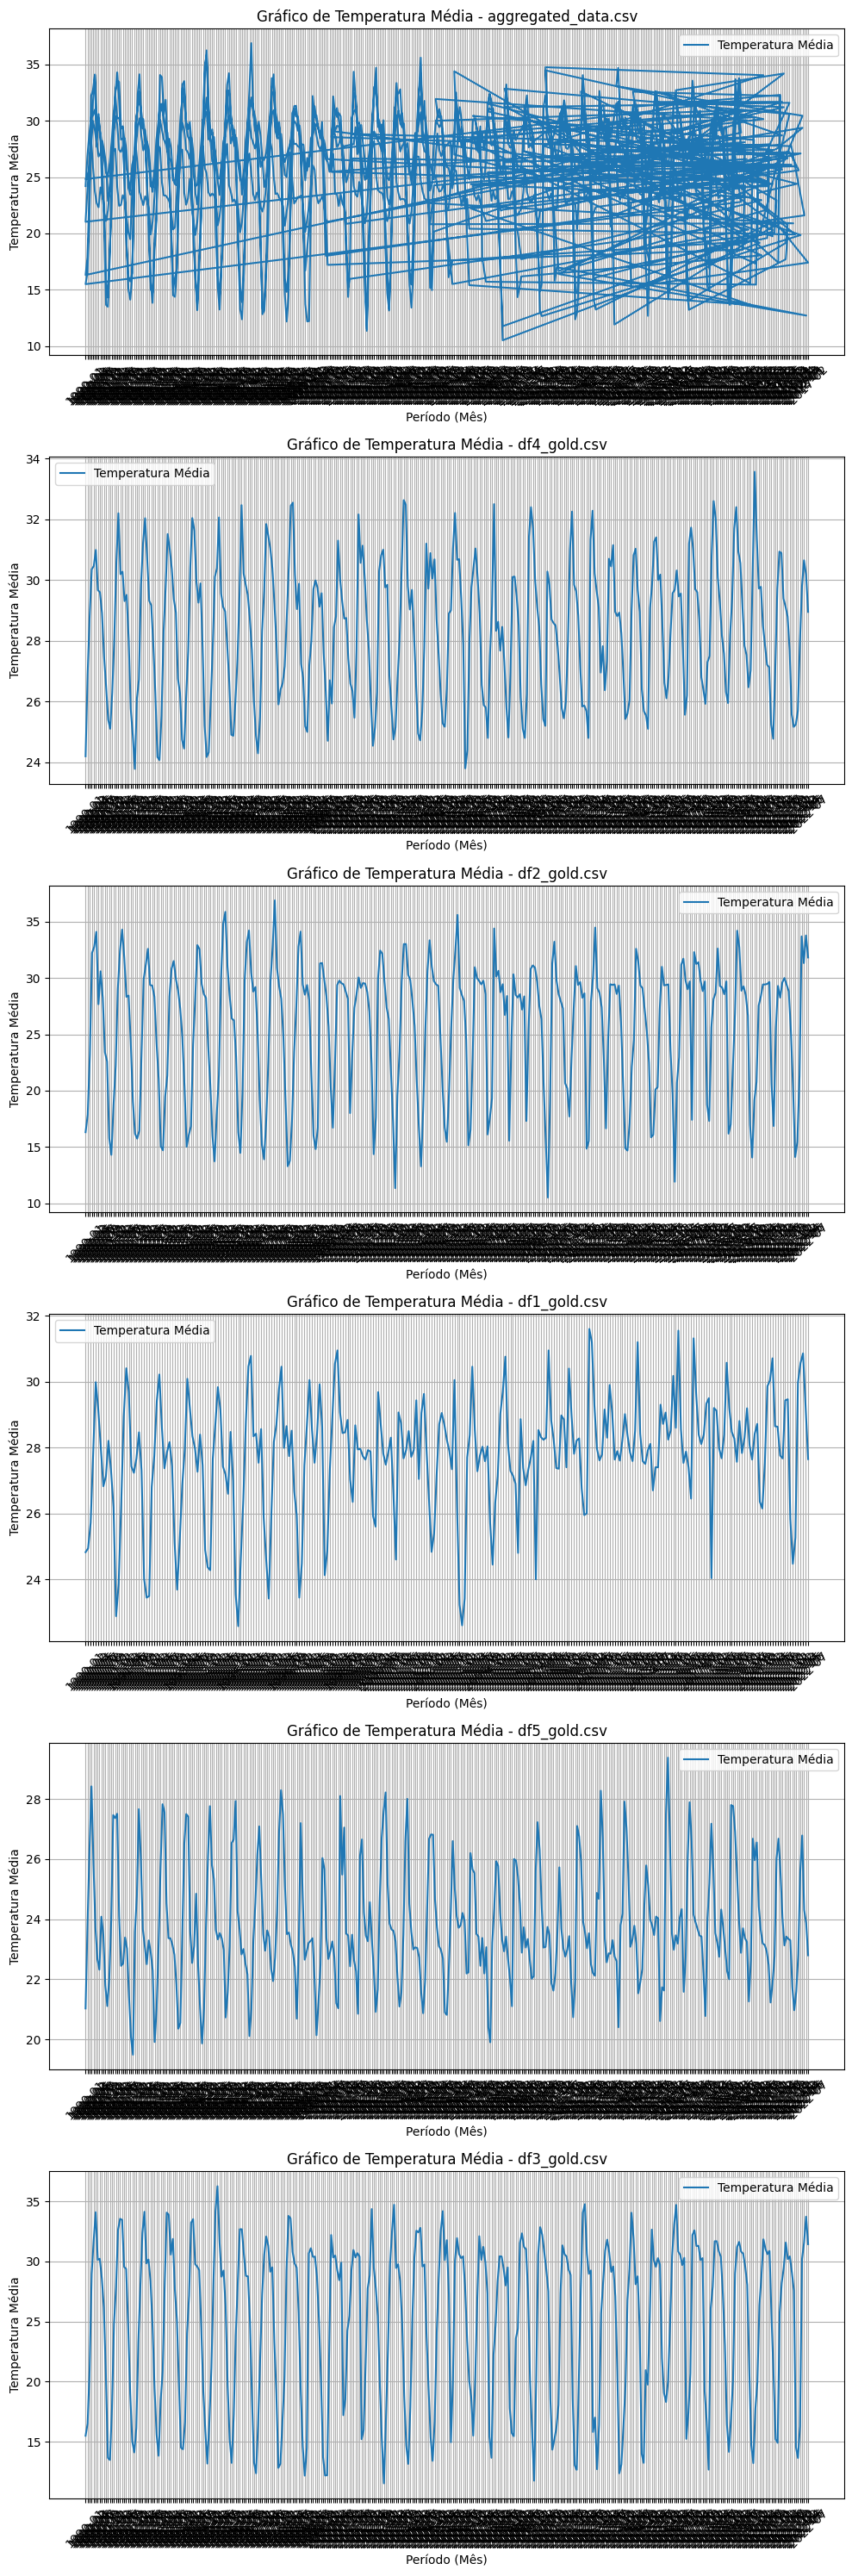

/content/gold_collection/aggregated_data.csv

/content/gold_collection/df4_gold.csv

/content/gold_collection/df2_gold.csv

/content/gold_collection/df1_gold.csv

/content/gold_collection/df5_gold.csv

/content/gold_collection/df3_gold.csv

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, FileLink


def display_all_gold_files(gold_folder='/content/gold_collection'):

    gold_files = [f for f in os.listdir(gold_folder) if f.endswith('.csv')]

    num_files = len(gold_files)
    fig, axs = plt.subplots(num_files, 1, figsize=(10, 5 * num_files))

    for i, filename in enumerate(gold_files):
        file_path = os.path.join(gold_folder, filename)

        df = pd.read_csv(file_path)

        print(f'\nExibindo dados de: {filename}')
        display(df.head())


        axs[i].plot(df['periodo'].astype(str), df['temp_media'], label='Temperatura Média')
        axs[i].set_xlabel('Período (Mês)')
        axs[i].set_ylabel('Temperatura Média')
        axs[i].set_title(f'Gráfico de Temperatura Média - {filename}')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid(True)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

    for filename in gold_files:
        file_path = os.path.join(gold_folder, filename)
        display(FileLink(file_path))

display_all_gold_files()


In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import os


def upload_files_to_firebase(local_folder, firebase_folder):

    bucket = storage.bucket()

    for filename in os.listdir(local_folder):
        if filename.endswith('.csv'):
            local_file_path = os.path.join(local_folder, filename)


            firebase_file_path = os.path.join(firebase_folder, filename)


            blob = bucket.blob(firebase_file_path)
            blob.upload_from_filename(local_file_path)

            print(f"Arquivo {filename} enviado para {firebase_file_path} no Firebase.")

upload_files_to_firebase('/content/silver_collection', 'silver_collection/')

upload_files_to_firebase('/content/gold_collection', 'gold_collection/')

Arquivo dataset4_silver.csv enviado para silver_collection/dataset4_silver.csv no Firebase.
Arquivo dataset1_silver.csv enviado para silver_collection/dataset1_silver.csv no Firebase.
Arquivo dataset5_silver.csv enviado para silver_collection/dataset5_silver.csv no Firebase.
Arquivo dataset2_silver.csv enviado para silver_collection/dataset2_silver.csv no Firebase.
Arquivo dataset3_silver.csv enviado para silver_collection/dataset3_silver.csv no Firebase.
Arquivo aggregated_data.csv enviado para gold_collection/aggregated_data.csv no Firebase.
Arquivo df4_gold.csv enviado para gold_collection/df4_gold.csv no Firebase.
Arquivo df2_gold.csv enviado para gold_collection/df2_gold.csv no Firebase.
Arquivo df1_gold.csv enviado para gold_collection/df1_gold.csv no Firebase.
Arquivo df5_gold.csv enviado para gold_collection/df5_gold.csv no Firebase.
Arquivo df3_gold.csv enviado para gold_collection/df3_gold.csv no Firebase.
